## Final Project Submission

Please fill out:
* Student name: Myrna Grace Calip
* Student pace: Part-Time
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:


# Overview
Microsoft is looking to create a movie studio using the following movie datasets:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

As a part of the Microsoft Film Analytics team, we are using our knowledge understand the given data to find which types of films are currently doing the best at the box office. 

## Business Problem
What type of films Microsoft should invest in to create a profitable and successful movie?

## Business Value

Many factors are considered into a production of a film. Funding, directors, genre, and ratings are highly regarded to avid movie goers. In order to maximize the success of Microsoft's movie production we will need to focus on the following questions:

- What genre are the most popular?
- Which movie ratings (G, PG, PG-13, R) generates the most profit?
- When is the best time to release a film?
- 

Once we gather our information we will determine the recommendations Microsoft needs to release a film that will catch the eye of the audience. 

# What can we find from the data given to us?
We need to follow certain steps in order to find valuable information from our data.
1. Load and explore the data
2. Sort out what data we should use 
3. Find the information we need to gain insights

## What movie genres are the most popular?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import json
import gzip
    

%matplotlib inline

In [2]:
# Load The Movie Data Base to get an overview of the data
tmdb_movies = 'tmdb.movies.csv.gz'

df_tmdb_movies = pd.read_csv(f'zippedData/{tmdb_movies}', index_col=0)
df_tmdb_movies.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [3]:
df_tmdb_movies_stats = df_tmdb_movies.describe()
df_tmdb_movies_stats 

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [4]:
df_tmdb_movies.sort_values('popularity', ascending=False, inplace=False).head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


In [5]:
df_tmdb_movies.sort_values('vote_count', ascending=False, inplace=False).head(100)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
...,...,...,...,...,...,...,...,...,...
11066,"[28, 12, 878]",157350,en,Divergent,16.982,2014-03-21,Divergent,6.9,8279
3672,"[28, 878, 12]",49538,en,X-Men: First Class,1.447,2011-06-03,X-Men: First Class,7.2,8211
11054,"[14, 12, 28, 10751, 10749]",102651,en,Maleficent,19.274,2014-05-30,Maleficent,7.0,8143
5195,"[16, 12, 35, 10751, 28, 14]",62177,en,Brave,18.908,2012-06-22,Brave,6.9,8116


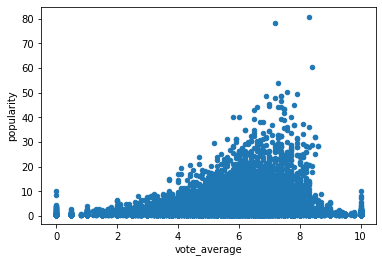

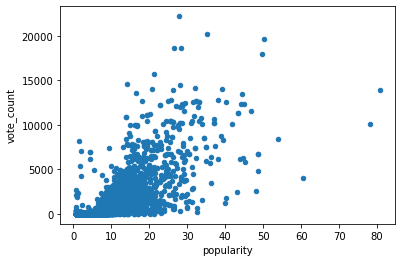

In [6]:
df_tmdb_movies.plot.scatter(x='vote_average', y='popularity');
df_tmdb_movies.plot.scatter(x='popularity', y='vote_count');


This is not very helpful but we can assume that there is a positive correlation between the popularity of the movie and the vote average as well as the vote count to popularity. 

In [7]:
df_tmdb_movies.sort_values('genre_ids')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
9992,"[10402, 10749, 18]",605434,en,bare: A Rock Musical,0.600,2013-09-06,bare: A Rock Musical,10.0,1
11735,"[10402, 10749, 18]",271164,en,The Song 2014,3.905,2014-09-26,The Song 2014,5.9,45
17813,"[10402, 10749, 35, 18]",207936,en,Tumbledown,7.004,2015-04-18,Tumbledown,6.4,88
14538,"[10402, 10749, 35, 18]",207936,en,Tumbledown,7.004,2015-04-18,Tumbledown,6.4,88
8527,"[10402, 10749, 35, 18]",214100,en,Sunshine on Leith,3.945,2013-10-03,Sunshine on Leith,6.7,64
...,...,...,...,...,...,...,...,...,...
12757,[],295726,en,Brothers in War,0.958,2014-03-26,Brothers in War,7.8,8
5060,[],81013,en,Heavy Times,0.600,2011-08-02,Heavy Times,4.0,1
12774,[],333780,en,Abandoned in the Dark,0.939,2014-11-08,Abandoned in the Dark,4.0,3
5094,[],298708,en,Blood Was Everywhere,0.600,2011-11-05,Blood Was Everywhere,3.0,1


Since we are interested in knowing which genres are the most popular. We need to cleanse the data from duplicates, remove missing values and change the genre numbers to their assigned genre names to get a better sense of the types of genre given rather than looking back and forth to the assigned genre ID.

In [8]:
df_tmdb_movies = df_tmdb_movies.loc[df_tmdb_movies['genre_ids'] != '[]']
df_tmdb_movies.shape

(24038, 9)

In [9]:
df_tmdb_movies.sort_values('genre_ids', ascending=False).head(100)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13467,[99],261810,en,Silenced,0.600,2014-11-19,Silenced,7.7,7
15976,[99],441888,en,America's Greatest Prison Breaks,0.883,2015-12-27,America's Greatest Prison Breaks,6.0,1
15977,[99],566441,en,The Hunger Games: The Phenomenon,0.882,2015-11-12,The Hunger Games: The Phenomenon,10.0,1
15988,[99],562517,en,Birdman: All-Access (A View From the Wings),0.881,2015-05-18,Birdman: All-Access (A View From the Wings),10.0,1
15989,[99],390455,en,IOM TT,0.881,2015-06-27,IOM TT,10.0,1
...,...,...,...,...,...,...,...,...,...
15779,[99],448155,en,Mac Dre: Legend of the Bay,1.131,2015-06-14,Mac Dre: Legend of the Bay,6.0,1
4355,[99],126782,en,Ufos On The Record,0.625,2011-08-25,Ufos On The Record,8.0,1
15676,[99],324307,en,Sneakerheadz,1.290,2015-03-16,Sneakerheadz,6.2,19
15683,[99],424480,en,The Lion In Your Living Room,1.270,2015-01-15,The Lion In Your Living Room,6.6,14


In [10]:
df_tmdb_movies['original_title'].nunique()

22478

In [11]:
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24038 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          24038 non-null  object 
 1   id                 24038 non-null  int64  
 2   original_language  24038 non-null  object 
 3   original_title     24038 non-null  object 
 4   popularity         24038 non-null  float64
 5   release_date       24038 non-null  object 
 6   title              24038 non-null  object 
 7   vote_average       24038 non-null  float64
 8   vote_count         24038 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [47]:
df_tmdb_movies[df_tmdb_movies.duplicated('original_title')]
df_tmdb_movies.value_counts('original_title')

original_title
Lucky                              4
Truth or Dare                      4
The Gift                           3
The Void                           3
Caught                             3
                                  ..
Schneeflöckchen                    1
Score: A Film Music Documentary    1
Searching                          1
Secret in Their Eyes               1
$ellebrity                         1
Length: 1412, dtype: int64

In [48]:
df_tmdb_movies[df_tmdb_movies['original_title'] == 'Tumbledown']

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14538,"[10402, 10749, 35, 18]",207936,en,Tumbledown,7.004,2015-04-18,Tumbledown,6.4,88


In [49]:
df_tmdb_movies = df_tmdb_movies.drop_duplicates(subset=['id'])
df_tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
1037,"[35, 18, 10749]",44369,tl,Boy,1.504,2009-06-01,Boy,7.5,2
1501,"[28, 18]",36410,en,Zero,0.840,2010-02-06,Zero,5.8,6
2290,[18],101318,en,Lies Between Friends,0.600,2010-07-31,Lies Between Friends,4.8,4
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
...,...,...,...,...,...,...,...,...,...
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26487,[27],505498,en,Parched,0.600,2018-01-02,Parched,3.0,2
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [50]:
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 1037 to 26511
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          1506 non-null   object 
 1   id                 1506 non-null   int64  
 2   original_language  1506 non-null   object 
 3   original_title     1506 non-null   object 
 4   popularity         1506 non-null   float64
 5   release_date       1506 non-null   object 
 6   title              1506 non-null   object 
 7   vote_average       1506 non-null   float64
 8   vote_count         1506 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 117.7+ KB


In [51]:
df_tmdb_movies.value_counts('id')

id
602984    1
308063    1
305642    1
306342    1
306667    1
         ..
399404    1
400617    1
400671    1
401060    1
129       1
Length: 1506, dtype: int64

In [16]:
# Import and inspect the data for inconsistencies
imbd_title = 'imdb.title.basics.csv.gz'

imbd_title_data = pd.read_csv(f'zippedData/{imbd_title}')
imbd_title_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [17]:
imbd_title_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [18]:
# Checks how many total missing values are in each column
imbd_title_data.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [19]:
imbd_title_data.dropna(subset=["genres","original_title", "runtime_minutes"], inplace=True)
imbd_title_data.info()
imbd_title_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [20]:
imbd_title_data.describe()

,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


In [21]:
# Drop runtime_minutes and double check if there are any missing values
imbd_title_data = imbd_title_data.drop('runtime_minutes', axis = 1)
imbd_title_data.isna().sum()

tconst            0
primary_title     0
original_title    0
start_year        0
genres            0
dtype: int64

In [22]:
imbd_title_ratings = 'imdb.title.ratings.csv.gz'

imbd_title_ratings_data = pd.read_csv(f'zippedData/{imbd_title_ratings}')
imbd_title_ratings_data
imbd_title_ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [23]:
imbd_title_ratings_data = imbd_title_ratings_data.loc[imbd_title_ratings_data['numvotes'] > 1000]
imbd_title_ratings_data.describe()

,averagerating,numvotes
count,9611.000000,9.611000e+03
mean,6.248996,2.627224e+04
std,1.158979,8.035996e+04
min,1.200000,1.001000e+03
25%,5.600000,1.656000e+03
50%,6.400000,3.468000e+03
75%,7.100000,1.215650e+04
max,9.700000,1.841066e+06


In [24]:
title_and_rating_df = imbd_title_data.merge(imbd_title_ratings_data, on="tconst")
title_and_rating_df

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
1,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248
2,tt0293069,Dark Blood,Dark Blood,2012,Thriller,6.6,1053
3,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",7.1,15378
4,tt0323808,The Wicker Tree,The Wicker Tree,2011,"Drama,Horror",3.9,2328
...,...,...,...,...,...,...,...
9596,tt9558612,PM Narendra Modi,PM Narendra Modi,2019,"Biography,Drama",3.7,4057
9597,tt9562694,Alien Warfare,Alien Warfare,2019,"Action,Sci-Fi",2.6,1509
9598,tt9573980,Leaving Neverland,Leaving Neverland,2019,Documentary,7.1,19632
9599,tt9778170,Panodrama,Panodrama,2019,Documentary,3.1,2220


In [25]:
highest_rating_genres = title_and_rating_df.loc[title_and_rating_df['averagerating'] >= 8.0, 'genres']
highest_rating_genres.head(10)

31      Adventure,Animation,Comedy
95               Documentary,Music
108                Biography,Drama
133         Adventure,Drama,Sci-Fi
153        Action,Adventure,Sci-Fi
174     Action,Adventure,Animation
199                 Drama,Thriller
226          Biography,Crime,Drama
260                    Documentary
331    Biography,Documentary,Music
Name: genres, dtype: object

In [26]:
highest_rating_genres.value_counts()

Drama                           46
Documentary                     36
Comedy,Drama                    20
Documentary,Music               12
Action,Drama                    11
                                ..
Comedy,Sport                     1
Drama,Western                    1
Biography,Comedy,Documentary     1
Action,Comedy,Thriller           1
Action,Biography,Crime           1
Name: genres, Length: 144, dtype: int64

In [27]:
movie_gross = 'bom.movie_gross.csv.gz'

df = pd.read_csv(f'zippedData/{movie_gross}', nrows=100)
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
95,Secretariat,BV,59700000.0,537000,2010
96,The Ghost Writer,Sum.,15500000.0,44700000,2010
97,Morning Glory,Par.,31000000.0,29000000,2010
98,Remember Me,Sum.,19100000.0,37000000,2010


In [28]:
df.head(11)
# Genres that have domestic gross = Animated, Action, Drama

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [29]:
df.tail(11)

,title,studio,domestic_gross,foreign_gross,year
89,The Girl Who Played with Fire,MBox,7600000.0,59500000,2010
90,Skyline,Uni.,21400000.0,45400000,2010
91,Hot Tub Time Machine,MGM,50300000.0,14300000,2010
92,Devil,Uni.,33600000.0,29100000,2010
93,127 Hours,FoxS,18300000.0,42400000,2010
94,Tyler Perry's Why Did I Get Married Too?,LGF,60100000.0,578000,2010
95,Secretariat,BV,59700000.0,537000,2010
96,The Ghost Writer,Sum.,15500000.0,44700000,2010
97,Morning Glory,Par.,31000000.0,29000000,2010
98,Remember Me,Sum.,19100000.0,37000000,2010


In [30]:
df.sort_values('domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
84,Tales from Earthsea,BV,48500.0,68600000,2010
63,Aftershock (Tangshan Dadizhen),CL,63000.0,100200000,2010
79,If You Are the One 2 (Fei Cheng Wu Rao II),CL,427000.0,75600000,2010
89,The Girl Who Played with Fire,MBox,7600000.0,59500000,2010
61,The Girl with the Dragon Tattoo,MBox,10100000.0,94300000,2010
...,...,...,...,...,...
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [31]:
df.sort_values('domestic_gross').head(11)

,title,studio,domestic_gross,foreign_gross,year
84,Tales from Earthsea,BV,48500.0,68600000,2010
63,Aftershock (Tangshan Dadizhen),CL,63000.0,100200000,2010
79,If You Are the One 2 (Fei Cheng Wu Rao II),CL,427000.0,75600000,2010
89,The Girl Who Played with Fire,MBox,7600000.0,59500000,2010
61,The Girl with the Dragon Tattoo,MBox,10100000.0,94300000,2010
96,The Ghost Writer,Sum.,15500000.0,44700000,2010
93,127 Hours,FoxS,18300000.0,42400000,2010
98,Remember Me,Sum.,19100000.0,37000000,2010
74,Oceans,BV,19400000.0,63200000,2010
88,The Next Three Days,LGF,21100000.0,46300000,2010


In [32]:
df.sort_values('domestic_gross').tail(11)

,title,studio,domestic_gross,foreign_gross,year
14,The Karate Kid,Sony,176600000.0,182500000,2010
7,Tangled,BV,200800000.0,391000000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
3,Inception,WB,292600000.0,535700000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [33]:
movie_info = 'rt.movie_info.tsv.gz'

movie_info_data = pd.read_table(f'zippedData/{movie_info}')
movie_info_data

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [34]:
movie_info_data.sort_values('box_office')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
86,108,A picture-perfect family moves into an upscale...,R,Comedy|Drama|Kids and Family,Derrick Borte,Derrick Borte,"Apr 16, 2010","Aug 10, 2010",$,"1,000,000",93 minutes,Roadside Attractions
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
809,1046,Writer/director Rodrigo Garca (Nine Lives) tea...,R,Drama,NaN,NaN,"May 7, 2010","Dec 14, 2010",$,"1,110,286",126 minutes,Sony Pictures Classics
1087,1398,"A heartfelt tale of inspiration, hope and rede...",PG,Drama|Kids and Family|Faith and Spirituality,David Nixon|Patrick Doughtie,NaN,"Apr 9, 2010","Aug 10, 2010",$,"1,121,000",110 minutes,Vivendi Entertainment
1213,1564,Real-life sweethearts Michael Cera and Charlyn...,PG-13,Comedy,Nicholas Jasenovec,Nicholas Jasenovec|Charlyne Yi,"Aug 14, 2009","Dec 1, 2009",$,"1,149,350",89 minutes,Overture Films
...,...,...,...,...,...,...,...,...,...,...,...,...
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [35]:
movie_reviews = 'rt.reviews.tsv.gz'

movie_reviews_data = pd.read_table(f'zippedData/{movie_reviews}', nrows=100)
movie_reviews_data

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
95,3,"Sometimes, even a little gratuitous nudity can...",1/4,rotten,James Berardinelli,1,ReelViews,"August 16, 2012"
96,3,"Cronenberg turns a difficult, sometimes frustr...",C,rotten,Keith Phipps,1,AV Club,"August 16, 2012"
97,3,"Easier to admire than to love, David Cronenber...",7.5/10,fresh,Alison Willmore,0,Movieline,"August 15, 2012"
98,3,"Cosmopolis"" is Cronenberg's best film since ""e...",A-,fresh,Jordan Hoffman,1,Film.com,"August 15, 2012"
